In [2]:
#%ls

In [1]:
from pyspark.sql import SparkSession, DataFrame, functions as F
from pyspark.ml.feature import Imputer, StringIndexer, VectorIndexer, VectorAssembler, OneHotEncoderEstimator, PCA, Bucketizer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline

import pandas as pd
import pandas_profiling
import os
for dirname, _, filenames in os.walk('/Users/garbamoussa/Desktop/Python_ML'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/Users/garbamoussa/Desktop/Python_ML/Learning curves for LogisticRegressionCV.png
/Users/garbamoussa/Desktop/Python_ML/SCA_Pandsa_corrigé.ipynb
/Users/garbamoussa/Desktop/Python_ML/final_submission.csv
/Users/garbamoussa/Desktop/Python_ML/Digital-Assets_2015_Data-Mining-and-Predictive-Analysis.pdf
/Users/garbamoussa/Desktop/Python_ML/Predict_Employee_Retention_Using_Keras_and_TensorFlow_1566551518.pdf
/Users/garbamoussa/Desktop/Python_ML/Book.pdf
/Users/garbamoussa/Desktop/Python_ML/Section_2_ARIMA_Models_tutorial.ipynb
/Users/garbamoussa/Desktop/Python_ML/Hypothesis_Testing_1567682562.pdf
/Users/garbamoussa/Desktop/Python_ML/.code_devoteam.ipynb.xcworkspace.icloud
/Users/garbamoussa/Desktop/Python_ML/Supervised_Machine_Learning_1566211403.pdf
/Users/garbamoussa/Desktop/Python_ML/Optimization_Using_Python_1567336166.pdf
/Users/garbamoussa/Desktop/Python_ML/Two_sigma_competition.ipynb
/Users/garbamoussa/Desktop/Python_ML/data_cla.html
/Users/garbamoussa/Desktop/Python_ML/.Chapter-9---Op

In [2]:
%pwd

'/Users/garbamoussa/Desktop/Python_ML'

In [3]:
spark = SparkSession.builder.appName("Africa-Bank-Dataset").config('spark.driver.memory','15g').getOrCreate()
spark
# spark.stop()

In [4]:
bank_xls = pd.read_excel('What_does_aid_to_Africa_finance.xls')

In [5]:
bank_xls.head()

,countryc,year,agrgdp,popn,infmort,schprim,schsec,grtdsbp,grlndsbp,aiddsbp,...,dcurexpp,dcapexpp,dprirepp,dcnlnagp,dcnlnenp,dcnlninp,dcnlntacp,dcnlnedup,dcnlnhthp,dcnlnothp
0,Burkina Faso,1970,35.4419,5633000,141.4,13,1,13.3183,1.02303,14.3413,...,.,.,.,.,.,.,.,.,.,.
1,Burkina Faso,1971,36.1674,5740700,139.2,13.6,1.2,16.7044,0.655764,17.3602,...,.,.,.,.,.,.,.,.,.,.
2,Burkina Faso,1972,37.5106,5848380,137,14.2,1.4,20.9176,2.97721,23.8949,...,.,.,.,.,.,.,.,.,.,.
3,Burkina Faso,1973,34.8343,5958700,135,14.8,1.6,25.9792,3.87817,29.8573,...,.,.,-4.26293,0.290099,0.057891,2.5305,-0.38238,0,0,-0.11642
4,Burkina Faso,1974,36.4801,6075700,133,15.4,1.8,38.6306,6.66204,45.2926,...,.,.,.,.,.,.,.,.,.,.


In [6]:
from pandas.io.excel import ExcelWriter
import pandas as pd 

bank_xls.to_csv('bank_csv.csv', encoding='utf-8')

In [7]:
bank_xls.head()

,countryc,year,agrgdp,popn,infmort,schprim,schsec,grtdsbp,grlndsbp,aiddsbp,...,dcurexpp,dcapexpp,dprirepp,dcnlnagp,dcnlnenp,dcnlninp,dcnlntacp,dcnlnedup,dcnlnhthp,dcnlnothp
0,Burkina Faso,1970,35.4419,5633000,141.4,13,1,13.3183,1.02303,14.3413,...,.,.,.,.,.,.,.,.,.,.
1,Burkina Faso,1971,36.1674,5740700,139.2,13.6,1.2,16.7044,0.655764,17.3602,...,.,.,.,.,.,.,.,.,.,.
2,Burkina Faso,1972,37.5106,5848380,137,14.2,1.4,20.9176,2.97721,23.8949,...,.,.,.,.,.,.,.,.,.,.
3,Burkina Faso,1973,34.8343,5958700,135,14.8,1.6,25.9792,3.87817,29.8573,...,.,.,-4.26293,0.290099,0.057891,2.5305,-0.38238,0,0,-0.11642
4,Burkina Faso,1974,36.4801,6075700,133,15.4,1.8,38.6306,6.66204,45.2926,...,.,.,.,.,.,.,.,.,.,.


In [8]:
sdf_train = spark.read.csv('bank_csv.csv', inferSchema = True, header = True)

In [29]:
sdf_train.limit(800).toPandas().T

,0,1,2,3,4,5,6,7,8,9,...,461,462,463,464,465,466,467,468,469,470
_c0,0,1,2,3,4,5,6,7,8,9,...,461,462,463,464,465,466,467,468,469,470
countryc,Burkina Faso,Burkina Faso,Burkina Faso,Burkina Faso,Burkina Faso,Burkina Faso,Burkina Faso,Burkina Faso,Burkina Faso,Burkina Faso,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
agrgdp,35.44188862,36.16739069,37.51058767,34.83428571,36.48014145,34.27100776,34.80431988,34.31152713,36.08594394,34.21393892,...,15.91522678,14.00441457,15.67318079,14.41019318,16.35990421,16.34676229,10.69898883,15.18143668,..,..
popn,5633000,5740700,5848380,5958700,6075700,6202000,6341030,6486870,6639120,6797540,...,8603690,8891070,9178930,9465010,9747000,10018560,10281620,10535140,10778400,11011000
infmort,141.3999939,139.1999969,137,135,133,131,129,127,125,123,...,69.27999878,66.59999847,63.83999863,61.07999878,58.31999893,55.55999908,52.79999924,53.61999893,54.43999863,55.25999832
schprim,13,13.6,14.2,14.8,15.4,16,15,16,17,18,...,132.75,130.5,128.25,126,116,122,119,119,..,..
schsec,1,1.2,1.4,1.6,1.8,2,2,2,2,3,...,42.6,44.2,45.8,47.4,49,52,47,45,..,..
grtdsbp,13.31828,16.7044,20.91765,25.97915,38.63058,30.44863,24.31813,27.81278,41.1725,56.8611,...,24.93159,31.00777,30.59964,28.60612,35.7149,36.44475,55.2424,30.81144,36.1657,39.95823
grlndsbp,1.023035,0.6557635,2.977209,3.878174,6.662035,7.368602,8.15182,11.51949,12.00825,12.25341,...,10.80265,12.95614,8.225724,6.920897,9.761152,8.955627,30.24875,22.15637,20.10495,15.56353


In [6]:
import pandas as pd 
Data_bank = pd.read_excel('Data_bank.xlsx')

Aide_Africa_Finance = pd.read_excel('What_does_aid_to_Africa_finance.xls')

In [53]:
Data_bank.head()

,DMU,CountryYear,Country code,Country,Bank,ID,Foreign,Government,Bank code,Listed,...,MF,TF,IF,FinF,LoanLossRatio,IndepYear,Indep,Religion,W-House,W-Senate
0,Albaraka of Algeria-Banque Al Baraka d'Algerie...,Algeria/2005,1,Algeria,Albaraka of Algeria-Banque Al Baraka d'Algerie,AlgeriaAlbaraka of Algeria-Banque Al Baraka d'...,1,0,1,0,...,80.1,54.4,50.0,30.0,0.016087,1962,43,1,0.062,0.028
1,Albaraka of Algeria-Banque Al Baraka d'Algerie...,Algeria/2006,1,Algeria,Albaraka of Algeria-Banque Al Baraka d'Algerie,AlgeriaAlbaraka of Algeria-Banque Al Baraka d'...,1,0,1,0,...,78.8,61.0,50.0,30.0,0.011508,1962,44,1,0.062,0.028
2,Albaraka of Algeria-Banque Al Baraka d'Algerie...,Algeria/2007,1,Algeria,Albaraka of Algeria-Banque Al Baraka d'Algerie,AlgeriaAlbaraka of Algeria-Banque Al Baraka d'...,1,0,1,0,...,80.7,66.0,50.0,20.0,0.013184,1962,45,1,0.077,0.029
3,Albaraka of Algeria-Banque Al Baraka d'Algerie...,Algeria/2008,1,Algeria,Albaraka of Algeria-Banque Al Baraka d'Algerie,AlgeriaAlbaraka of Algeria-Banque Al Baraka d'...,1,0,1,0,...,80.2,68.8,40.0,30.0,0.003875,1962,46,1,0.077,0.029
4,Albaraka of Algeria-Banque Al Baraka d'Algerie...,Algeria/2009,1,Algeria,Albaraka of Algeria-Banque Al Baraka d'Algerie,AlgeriaAlbaraka of Algeria-Banque Al Baraka d'...,1,0,1,0,...,78.6,68.6,50.0,30.0,0.004255,1962,47,1,0.077,0.051


In [54]:
Data_bank.shape

(1306, 119)

In [55]:
Data_bank.columns

Index(['DMU', 'CountryYear', 'Country code', 'Country', 'Bank', 'ID',
       'Foreign', 'Government', 'Bank code', 'Listed',
       ...
       'MF', 'TF', 'IF', 'FinF', 'LoanLossRatio', 'IndepYear', 'Indep',
       'Religion', 'W-House', 'W-Senate'],
      dtype='object', length=119)

In [56]:
#train.profile_report(style={'full_width':True})
import pandas_profiling
import numpy as np
from pathlib import Path


 # Prepare missing values
#Data_bank.ProfileReport(style={'full_width':True})
#Data_bank = Data_bank.replace("\\?", np.nan, regex=True)
profile = pandas_profiling.ProfileReport(Data_bank) 
profile = pandas_profiling.ProfileReport(Data_bank, check_correlation = False)
profile.to_file(outputfile="/Users/garbamoussa/Desktop/Python_ML/Bank_African.html")
#profile.to_file(output_file=Path("./Africa_Bank_report.html"))


In [58]:
#profile

In [43]:
import numpy as np
import pandas as pd
import pandas_profiling

df = pd.DataFrame(
    np.random.rand(100, 5),
    columns=['a', 'b', 'c', 'd', 'e']
)

In [56]:
# Création d'une fonction permettant de calculer le total de valeurs manquantes, le pourcentage et le type de 
 ## chaque colonne 
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [57]:
missing_data(Data_bank)

,DMU,CountryYear,Country code,Country,Bank,ID,Foreign,Government,Bank code,Listed,...,MF,TF,IF,FinF,LoanLossRatio,IndepYear,Indep,Religion,W-House,W-Senate
Total,0,0,0,0,0,0,0,0,0,0,...,77,77,77,77,94,0,0,0,43,813
Percent,0,0,0,0,0,0,0,0,0,0,...,5.89587,5.89587,5.89587,5.89587,7.19755,0,0,0,3.2925,62.2511
Types,object,object,int64,object,object,object,int64,int64,int64,int64,...,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64


In [8]:
Bank_Country = pd.crosstab(Data_bank.Country, Data_bank.Bank)

In [8]:
Foreign_By_Country = pd.crosstab(Data_bank.Country, Data_bank.Foreign)

In [9]:
#Sort_by_Foreign = Foreign_By_Country.sort_values('Foreign')

In [10]:
# Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import tkinter
#import matplotlib
#matplotlib.use('TkAgg')
import seaborn as sns
import os
%matplotlib inline

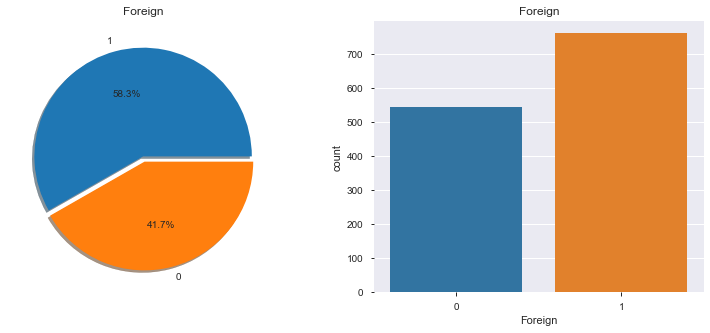

In [11]:
f,ax=plt.subplots(1,2,figsize=(13,5))
Data_bank['Foreign'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Foreign')
ax[0].set_ylabel('')
sns.countplot('Foreign',data=Data_bank,ax=ax[1])
ax[1].set_title('Foreign')
plt.show()

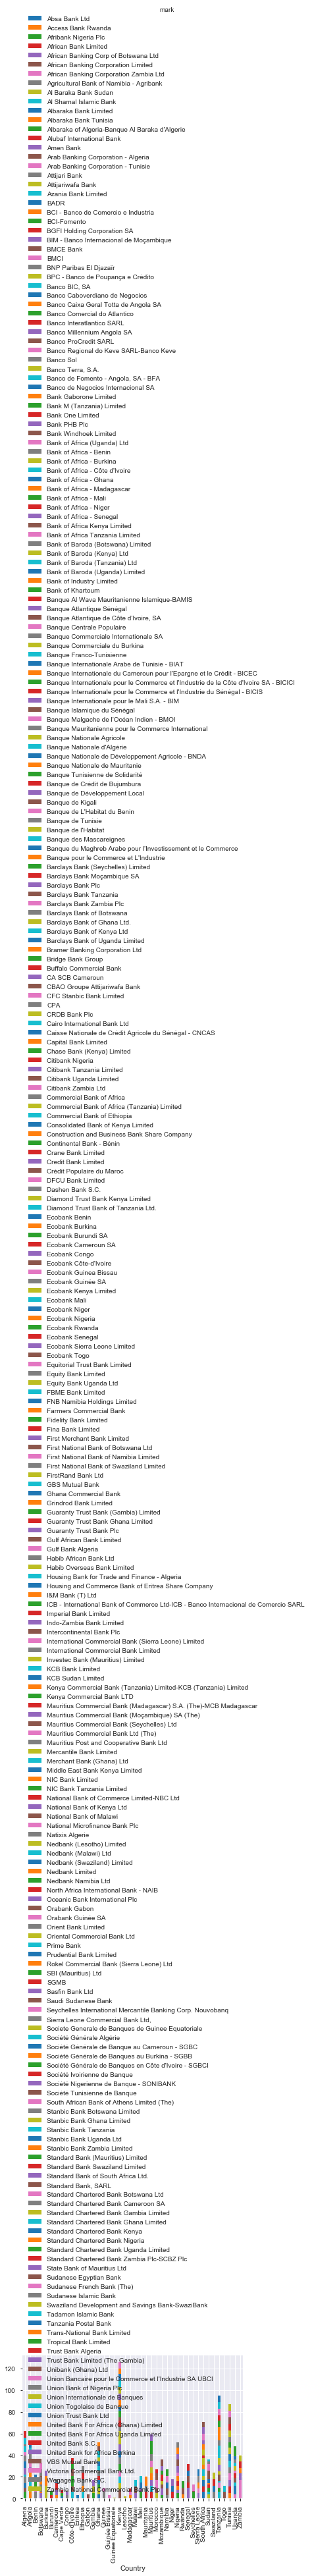

In [12]:
import seaborn as sns 

Bank_Country.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

In [25]:

groupedvalues=Data_bank.groupby('Country').sum().reset_index()
#g=sns.barplot(x='Country',y='PerExp',data=groupedvalues)

In [26]:
groupedvalues

,Country,Country code,Foreign,Government,Bank code,Listed,Islamic,year,ES,ES2,...,MF,TF,IF,FinF,LoanLossRatio,IndepYear,Indep,Religion,W-House,W-Senate
0,Algeria,62,36,18,467,0,0,124480,37.001482,26.724619,...,4908.8,4072.6,2930.0,1760.0,1.394897,121644,2836,62,4.519,2.309
1,Angola,104,17,12,989,0,0,104395,13.489403,10.391590,...,2431.8,3207.6,1125.0,1890.0,1.705636,102700,1695,208,14.055,0.000
2,Benin,66,12,0,561,6,0,44163,7.143274,5.849797,...,1756.2,1349.6,830.0,1210.0,0.325823,43120,1043,88,2.088,0.000
3,Botswana,132,22,0,1058,15,0,66256,14.612712,9.085916,...,2412.5,2365.7,2360.0,2310.0,0.320858,64878,1378,132,3.279,0.000
4,Burkina,130,26,0,983,6,0,52188,6.121131,5.393487,...,2084.5,1721.9,1170.0,1300.0,1.309644,50960,1228,26,3.618,0.000
5,Burundi,42,6,0,298,0,0,14061,1.021471,0.712196,...,488.4,424.2,270.0,210.0,0.149294,13734,327,14,2.185,2.621
6,Cameroun,126,18,0,842,0,0,36144,8.468642,4.117013,...,1364.6,1027.2,800.0,880.0,0.039071,35280,864,72,2.302,0.000
7,Cape Verde,328,6,0,2257,3,0,16073,2.340487,2.238662,...,611.6,475.1,480.0,460.0,0.052264,15800,273,16,1.448,0.000
8,Congo,252,6,0,1713,0,0,12051,2.311475,1.392908,...,0.0,0.0,0.0,0.0,0.074013,11760,291,12,0.438,0.778
9,Côte-d'Ivoire,370,32,0,2033,16,0,74270,14.221245,8.501828,...,2933.5,2360.7,1595.0,2390.0,0.467672,72520,1750,37,3.241,0.000


In [29]:
Togo_Bank = Data_bank[Data_bank.Country == 'Togo']['Bank'].value_counts()

In [30]:
Togo_Bank.head()

Union Togolaise de Banque    6
Ecobank Togo                 6
Name: Bank, dtype: int64

In [32]:
Uganda_Bank = Data_bank[Data_bank.Country == 'Uganda']['Bank'].value_counts()

In [33]:
Uganda_Bank

Equity Bank Uganda Ltd                    4
Bank of Baroda (Uganda) Limited           4
Citibank Uganda Limited                   4
Barclays Bank of Uganda Limited           4
Bank of Africa (Uganda) Ltd               4
Crane Bank Limited                        4
Stanbic Bank Uganda Ltd                   3
KCB Bank Limited                          3
United Bank For Africa Uganda Limited     3
Standard Chartered Bank Uganda Limited    3
DFCU Bank Limited                         3
Cairo International Bank Ltd              3
Orient Bank Limited                       3
Tropical Bank Limited                     3
Name: Bank, dtype: int64

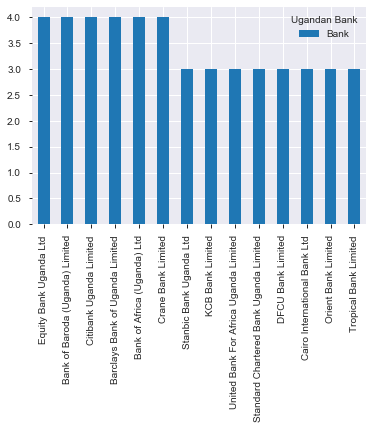

In [35]:
import seaborn as sns 

Uganda_Bank.plot.bar(stacked=True)
plt.legend(title='Ugandan Bank')

plt.show()

In [49]:
#f,ax=plt.subplots(1,2,figsize=(30,15))
#sns.countplot('Bank',data=Data_bank,ax=ax[0])
#ax[0].set_title('No. Of Banks')
#sns.countplot('Bank',hue='Country',data=Data_bank,ax=ax[1])
#ax[1].set_title('Bank vs Country')
#plt.subplots_adjust(wspace=0.2,hspace=0.5)
#plt.show()

In [ ]:
#train.profile_report(style={'full_width':True})
import pandas_profiling
import numpy as np
from pathlib import Path
#

 # Prepare missing values
#Data_bank.ProfileReport(style={'full_width':True})
#Data_bank = Data_bank.replace("\\?", np.nan, regex=True)
profile = pandas_profiling.ProfileReport(Data_bank) 
profile = pandas_profiling.ProfileReport(Data_bank, check_correlation = False)
profile.to_file(outputfile="/Users/garbamoussa/Desktop/Python_ML/Bank_African.html")
#profile.to_file(output_file=Path("./Africa_Bank_report.html"))

In [48]:
#profile

In [30]:
from pandas_summary import DataFrameSummary

#dfs = DataFrameSummary(Data_bank)

In [9]:
type(iris)

sklearn.utils.Bunch

In [10]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [13]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [14]:
df['species'] = iris.target

In [16]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [17]:
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
es = ft.EntitySet(id = 'iris')

In [21]:
es

Entityset: iris
  Entities:
  Relationships:
    No relationships

In [22]:
es.entity_from_dataframe(entity_id = 'data', dataframe = df, 
                         make_index = True, index = 'index')

Entityset: iris
  Entities:
    data [Rows: 150, Columns: 6]
  Relationships:
    No relationships

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
5,5,5.4,3.9,1.7,0.4,setosa
6,6,4.6,3.4,1.4,0.3,setosa
7,7,5.0,3.4,1.5,0.2,setosa
8,8,4.4,2.9,1.4,0.2,setosa
9,9,4.9,3.1,1.5,0.1,setosa


In [27]:
from featuretools.primitives import make_agg_primitive, make_trans_primitive
from featuretools.variable_types import Text, Numeric
from featuretools import primitives, variable_types
#from featuretools.entityset.relationship import RelationshipPath
from featuretools.feature_base import (
    AggregationFeature,
    DirectFeature,
    GroupByTransformFeature,
    IdentityFeature,
    TransformFeature
)
from featuretools.primitives.base import (
    AggregationPrimitive,
    PrimitiveBase,
    TransformPrimitive
)
from featuretools.utils import is_string
from featuretools.variable_types import Boolean, Discrete, Id, Numeric

feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'data',
                                      trans_primitives = ['add_numeric', 'multiply_numeric'])


ModuleNotFoundError: No module named 'featuretools.feature_base'

In [63]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

#open(path).readline()

In [61]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt' 
records = [json.loads(line) for line in open(path, 'rb')]

FileNotFoundError: [Errno 2] No such file or directory: 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [65]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0 for x in sequence:
    for x in sequence: 
        counts[x] += 1
        return counts

In [68]:
from pandas import DataFrame, Series 
import pandas as pd


In [69]:
Data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Columns: 119 entries, DMU to W-Senate
dtypes: float64(102), int64(10), object(7)
memory usage: 1.2+ MB


In [70]:
Bank_counts = Data_bank['Bank'].value_counts()

In [71]:
Bank_counts[:10]

Banco Regional do Keve SARL-Banco Keve                         6
Azania Bank Limited                                            6
Tanzania Postal Bank                                           6
Stanbic Bank Tanzania                                          6
Diamond Trust Bank Kenya Limited                               6
Ecobank Niger                                                  6
Ecobank Benin                                                  6
Nedbank Namibia Ltd                                            6
Bank of Africa - Niger                                         6
Seychelles International Mercantile Banking Corp. Nouvobanq    6
Name: Bank, dtype: int64

In [75]:
clean_Bank = Data_bank['Bank'].fillna('Missing')
clean_Bank[clean_Bank == ''] = 'Unknow'
Bank_counts = clean_Bank.value_counts()
Bank_counts[:10]

Banco Regional do Keve SARL-Banco Keve                         6
Azania Bank Limited                                            6
Tanzania Postal Bank                                           6
Stanbic Bank Tanzania                                          6
Diamond Trust Bank Kenya Limited                               6
Ecobank Niger                                                  6
Ecobank Benin                                                  6
Nedbank Namibia Ltd                                            6
Bank of Africa - Niger                                         6
Seychelles International Mercantile Banking Corp. Nouvobanq    6
Name: Bank, dtype: int64

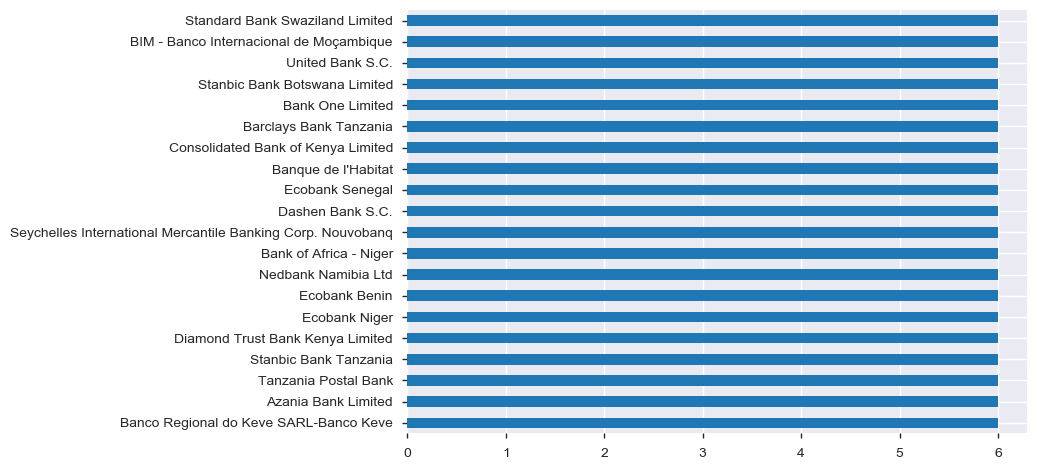

In [77]:
Bank_counts[:20].plot(kind='barh', rot=0)

In [125]:
Bank_Foreign = Data_bank[['Government', 'Foreign', 'Bank', 'Country', 'year', 'ES', 'ES2', 'DepSTFund', 'Equity']]

In [126]:
Bank_Foreign.head()

,Government,Foreign,Bank,Country,year,ES,ES2,DepSTFund,Equity
0,0,1,Albaraka of Algeria-Banque Al Baraka d'Algerie,Algeria,2005,0.41,0.40,299.07,46.30
1,0,1,Albaraka of Algeria-Banque Al Baraka d'Algerie,Algeria,2006,0.34,0.33,380.17,66.51
2,0,1,Albaraka of Algeria-Banque Al Baraka d'Algerie,Algeria,2007,0.53,0.50,643.65,86.52
3,0,1,Albaraka of Algeria-Banque Al Baraka d'Algerie,Algeria,2008,0.50,0.50,854.75,138.57
4,0,1,Albaraka of Algeria-Banque Al Baraka d'Algerie,Algeria,2009,0.46,0.46,"1,053.77",215.05


In [127]:
by_Equity = Bank_Foreign['Equity'].groupby(['Country'])

KeyError: 'Country'

In [ ]:
Bank_Foreign.reset()

In [87]:
by_tz_os = Bank_Foreign.groupby(['Country'])

In [88]:
by_tz_os

In [91]:
#agg_counts = by_tz_os.size().unstack().fillna(0)

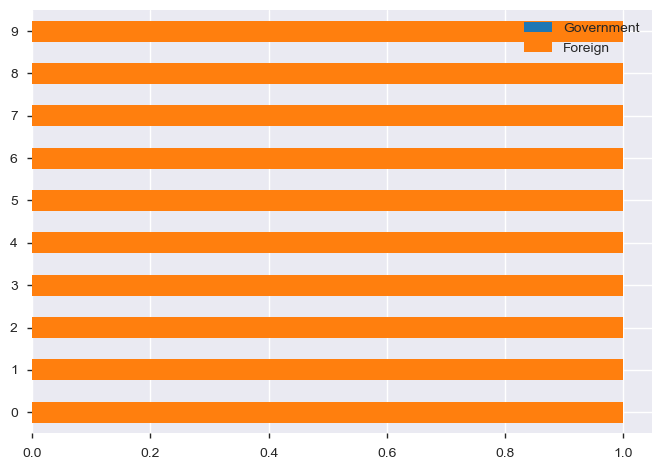

In [93]:
Bank_Foreign[:10].plot(kind='barh', stacked=True)

In [98]:
import pandas as pd

# Display 6 columns for viewing purposes
pd.set_option('display.max_columns', 119)

# Reduce decimal points to 2
pd.options.display.float_format = '{:,.2f}'.format


Data_bank.head(2)

,DMU,CountryYear,Country code,Country,Bank,ID,Foreign,Government,Bank code,Listed,Type,Islamic,year,ES,ES2,Cost2Inc,DepSTFund,Equity,Eq2Assets,FixAssets,GLoans,NPL2GL,LoanLP,Loans,NetFeeCom,NetIntRev,Branches,Employees,OthOpExp,OthOpInc,Overhead,PerExp,ROAA,ROAE,Assets,LnAssets,BusinessVol,EarnAssets,Funding,IntExp,NonIntExp,NonIntOpInc,OthEarnAssets,ExRate,Unit,GDPG,GDPC,LnGDPC,GDPGC,PCDGDP,ICP,IGDPD,STMC,STMR,ETU,PAU,TRU,EXU,CSU,LDU,PCU,FSU,SQU,SCU,ETW,PAW,TRW,EXW,CSW,LDW,PCW,FSW,SQW,SCW,IIILargeAssets,VLargeAssets,HHIAssets,IIILargeLoans,VLargeLoans,HHILoans,IIILargeDeposits,VLargeDeposits,HHIDeposits,DomPrivOwnAssets,ForOwnAssets,GovOwnAssets,DomPrivOwnLoans,ForOwnLoans,GovOwnLoans,DomPrivOwnDeposits,ForOwnDeposits,GovOwnDeposits,BankCon,BankZsc,avelf,lat_abst,Legor,legor_uk,legor_fr,EFI,PP,CI,EconFree,PR,FC,FisF,GS,BF,LF,MF,TF,IF,FinF,LoanLossRatio,IndepYear,Indep,Religion,W-House,W-Senate
0,Albaraka of Algeria-Banque Al Baraka d'Algerie...,Algeria/2005,1,Algeria,Albaraka of Algeria-Banque Al Baraka d'Algerie,AlgeriaAlbaraka of Algeria-Banque Al Baraka d'...,1,0,1,0,CB,0,2005,0.41,0.40,0.37,299.07,46.30,0.08,10.09,374.10,nan,6.02,374.10,0.20,24.05,nan,nan,4.87,0.96,9.27,4.39,0.02,0.21,564.89,6.34,49.01,392.58,432.88,14.52,9.27,0.96,18.48,73.28,"1,000.00",0.05,"3,111.70",8.04,0.04,0.10,0.01,0.16,nan,nan,7.50,5.00,5.90,5.00,8.00,2.50,0.00,6.25,3.12,4.81,7.92,3.93,6.01,4.17,7.22,3.33,0.00,6.43,2.50,4.61,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.02,0.06,0.91,0.01,0.06,0.93,0.01,0.05,0.93,0.84,11.37,0.29,0.31,French,0.00,1.00,5.25,3.00,0.23,53.20,30.00,26.00,73.90,61.80,70.00,55.90,80.10,54.40,50.00,30.00,0.02,1962,43,1,0.06,0.03
1,Albaraka of Algeria-Banque Al Baraka d'Algerie...,Algeria/2006,1,Algeria,Albaraka of Algeria-Banque Al Baraka d'Algerie,AlgeriaAlbaraka of Algeria-Banque Al Baraka d'...,1,0,1,0,CB,0,2006,0.34,0.33,0.40,380.17,66.51,0.11,14.22,409.09,nan,4.71,409.09,0.30,31.40,nan,nan,8.41,6.68,15.39,6.98,0.02,0.25,632.79,6.45,53.44,430.88,503.67,17.28,15.39,6.68,21.79,72.65,"1,000.00",0.02,"3,508.91",8.16,0.00,0.11,0.02,0.11,nan,nan,7.50,5.00,5.90,5.00,8.00,2.50,0.00,6.25,3.12,4.81,7.92,3.93,6.01,4.17,7.22,3.33,0.00,6.43,2.50,4.61,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.01,0.07,0.92,0.01,0.08,0.91,0.01,0.06,0.93,0.84,14.88,0.29,0.31,French,0.00,1.00,5.17,3.00,0.23,55.70,30.00,27.00,73.90,74.40,74.80,57.40,78.80,61.00,50.00,30.00,0.01,1962,44,1,0.06,0.03


In [101]:

Bank_Foreign = Bank_Foreign.pivot_table(values='Foreign',
                                index='year',
                                columns=['Country', 'Bank', 'Government'])

In [102]:
Bank_Foreign

Country                                           Algeria  \
Bank       Albaraka of Algeria-Banque Al Baraka d'Algerie   
Government                                              0   
year                                                        
2005                                                 1.00   
2006                                                 1.00   
2007                                                 1.00   
2008                                                 1.00   
2009                                                 1.00   
2010                                                 1.00   

Country                                                                    \
Bank       Arab Banking Corporation - Algeria BADR BNP Paribas El Djazaïr   
Government                                  0    1                      0   
year                                                                        
2005                                     1.00  nan                   1.00   
2006                                     1.00  nan                   1.00   
2007                                     1.00 0.00                   1.00   
2008                                     1.00 0.00                   1.00   
2009                                      nan 0.00                   1.00   
2010                                      nan 0.00                   1.00   

Country                                                              \
Bank       Banque Nationale d'Algérie Banque de Développement Local   
Government                          1                             1   
year                                                                  
2005                              nan                          0.00   
2006                              nan                          0.00   
2007                              nan                          0.00   
2008                              nan                          0.00   
2009                             0.00                          0.00   
2010                             0.00                          0.00   

Country                                                                       \
Bank       Banque du Maghreb Arabe pour l'Investissement et le Commerce  CPA   
Government                                                            0    1   
year                                                                           
2005                                                     0.00           0.00   
2006                                                     0.00           0.00   
2007                                                     1.00           0.00   
2008                                                     1.00           0.00   
2009                                                     1.00           0.00   
2010                                                     1.00           0.00   

Country                                                                    \
Bank       Gulf Bank Algeria Housing Bank for Trade and Finance - Algeria   
Government                 0                                            0   
year                                                                        
2005                     nan                                          nan   
2006                     nan                                         1.00   
2007                     nan                                         1.00   
2008                    1.00                                         1.00   
2009                    1.00                                         1.00   
2010                    1.00                                         1.00   

Country                                                                 \
Bank       Natixis Algerie Société Générale Algérie Trust Bank Algeria   
Government               0                        0                  0   
year                                                                     
2005                   nan             

In [103]:
Bank_Foreign.columns.names

FrozenList(['Country', 'Bank', 'Government'])

In [105]:
Bank_Foreign['Nigeria'].head()

Bank,Afribank Nigeria Plc,Bank PHB Plc,Bank of Industry Limited,Citibank Nigeria,Ecobank Nigeria,Equitorial Trust Bank Limited,Guaranty Trust Bank Plc,Intercontinental Bank Plc,Oceanic Bank International Plc,Standard Chartered Bank Nigeria,Union Bank of Nigeria Plc
Government,0,0,1,0,0,0,0,0,0,0,0
year,,,,,,,,,,,
2005,0.00,nan,nan,1.00,nan,0.00,0.00,0.00,nan,1.00,nan
2006,0.00,0.00,0.00,nan,1.00,nan,0.00,0.00,1.00,1.00,1.00
2007,0.00,0.00,0.00,nan,1.00,nan,0.00,0.00,1.00,1.00,1.00
2008,nan,0.00,0.00,1.00,1.00,nan,0.00,0.00,1.00,1.00,1.00
2009,0.00,nan,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00
2010,0.00,nan,nan,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00


In [106]:
Bank_Foreign.stack().head()

Country                                                Algeria  \
Bank            Albaraka of Algeria-Banque Al Baraka d'Algerie   
year Government                                                  
2005 0                                                    1.00   
     1                                                     nan   
2006 0                                                    1.00   
     1                                                     nan   
2007 0                                                    1.00   

Country                                                  \
Bank            Arab Banking Corporation - Algeria BADR   
year Government                                           
2005 0                                        1.00  nan   
     1                                         nan  nan   
2006 0                                        1.00  nan   
     1                                         nan  nan   
2007 0                                        1.00  nan   

Country                                                            \
Bank            BNP Paribas El Djazaïr Banque Nationale d'Algérie   
year Government                                                     
2005 0                            1.00                        nan   
     1                             nan                        nan   
2006 0                            1.00                        nan   
     1                             nan                        nan   
2007 0                            1.00                        nan   

Country                                        \
Bank            Banque de Développement Local   
year Government                                 
2005 0                                    nan   
     1                                   0.00   
2006 0                                    nan   
     1                                   0.00   
2007 0                                    nan   

Country                                                                       \
Bank            Banque du Maghreb Arabe pour l'Investissement et le Commerce   
year Government                                                                
2005 0                                                        0.00             
     1                                                         nan             
2006 0                                                        0.00             
     1                                                         nan             
2007 0                                                        1.00             

Country                                 \
Bank             CPA Gulf Bank Algeria   
year Government                          
2005 0           nan               nan   
     1          0.00               nan   
2006 0           nan               nan   
     1          0.00               nan   
2007 0           nan               nan   

Country                                                                       \
Bank            Housing Bank for Trade and Finance - Algeria Natixis Algerie   
year Government                                                                
2005 0                                                   nan             nan   
     1                                                   nan             nan   
2006 0                                                  1.00             nan   
     1                                                   nan             nan   
2007 0                                                  1.00             nan   

Country                                                      \
Bank            Société Générale Algérie Trust Bank Algeria   
year Government                                               
2005 0                              1.00               0.00   
     1                               nan                nan   
2006 0                              1.00               0.00   
     1                               nan               

In [109]:
Bank_Foreign.stack(level='Country').head()

Bank          Absa Bank Ltd Access Bank Rwanda Afribank Nigeria Plc  \
Government                0                  0                    0   
year Country                                                          
2005 Algeria            nan                nan                  nan   
     Angola             nan                nan                  nan   
     Benin              nan                nan                  nan   
     Botswana           nan                nan                  nan   
     Burkina            nan                nan                  nan   

Bank          African Bank Limited African Banking Corp of Botswana Ltd  \
Government                       0                                    0   
year Country                                                              
2005 Algeria                   nan                                  nan   
     Angola                    nan                                  nan   
     Benin                     nan                                  nan   
     Botswana                  nan                                  nan   
     Burkina                   nan                                  nan   

Bank          African Banking Corporation Limited  \
Government                                      0   
year Country                                        
2005 Algeria                                  nan   
     Angola                                   nan   
     Benin                                    nan   
     Botswana                                 nan   
     Burkina                                  nan   

Bank          African Banking Corporation Zambia Ltd  \
Government                                         0   
year Country                                           
2005 Algeria                                     nan   
     Angola                                      nan   
     Benin                                       nan   
     Botswana                                    nan   
     Burkina                                     nan   

Bank          Agricultural Bank of Namibia - Agribank Al Baraka Bank Sudan  \
Government                                          1                    0   
year Country                                                                 
2005 Algeria                                      nan                  nan   
     Angola                                       nan                  nan   
     Benin                                        nan                  nan   
     Botswana                                     nan                  nan   
     Burkina                                      nan                  nan   

Bank          Al Shamal Islamic Bank Albaraka Bank Limited  \
Government                         1                     0   
year Country                                                 
2005 Algeria                     nan                   nan   
     Angola                      nan                   nan   
     Benin                       nan                   nan   
     Botswana                    nan                   nan   
     Burkina                     nan                   nan   

Bank          Albaraka Bank Tunisia  \
Government                        0   
year Country                          
2005 Algeria                    nan   
     Angola                     nan   
     Benin                      nan   
     Botswana                   nan   
     Burkina                    nan   

Bank          Albaraka of Algeria-Banque Al Baraka d'Algerie  \
Government                                                 0   
year Country                                                   
2005 Algeria                                            1.00   
     Angola                                              nan   
     Benin                                               nan   
     Botswana                                            nan   
     Burkina                                             nan   

Bank    

In [112]:
Aide_Africa_Finance.head()

,countryc,year,agrgdp,popn,infmort,schprim,schsec,grtdsbp,grlndsbp,aiddsbp,totexpp,agexpp,enexpp,indexpp,tacexpp,eduexpp,hthexpp,prirepp,curexpp,capexpp,gdnpp,d0,cnlnagp,cnlnenp,cnlninp,cnlntacp,cnlnedup,cnlnhthp,cnlnothp,dgrtdsbp,dgrlndsbp,daiddsbp,dtotexpp,dagexpp,denexpp,dindexpp,dtacexpp,deduexpp,dhthexpp,dothexpp,dcurexpp,dcapexpp,dprirepp,dcnlnagp,dcnlnenp,dcnlninp,dcnlntacp,dcnlnedup,dcnlnhthp,dcnlnothp
0,Burkina Faso,1970,35.44,5633000,141.40,13,1,13.32,1.02,14.34,.,.,.,.,.,.,.,0.50,.,.,246.41,10,0.05,0,0.32,0.01,0,0,0.29,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
1,Burkina Faso,1971,36.17,5740700,139.20,13.60,1.20,16.70,0.66,17.36,.,.,.,.,.,.,.,0.47,.,.,237.34,11,0.03,0,0.32,0.00,0,0,0.12,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
2,Burkina Faso,1972,37.51,5848380,137,14.20,1.40,20.92,2.98,23.89,.,.,.,.,.,.,.,4.93,.,.,270.99,13,0.53,0,0.19,0.57,0,0,0.62,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
3,Burkina Faso,1973,34.83,5958700,135,14.80,1.60,25.98,3.88,29.86,27.82,2.00,0.04,0.06,1.26,5.60,2.22,0.67,23.59,3.56,291.87,16,0.82,0.06,2.72,0.18,0,0,0.50,5.06,0.90,5.96,.,.,.,.,.,.,.,.,.,.,-4.26,0.29,0.06,2.53,-0.38,0,0,-0.12
4,Burkina Faso,1974,36.48,6075700,133,15.40,1.80,38.63,6.66,45.29,25.95,.,.,.,.,.,.,0.68,21.96,3.30,292.74,16,0.75,0.33,3.32,0.57,0,0,1.24,.,.,.,-1.87,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.


In [114]:
#train.profile_report(style={'full_width':True})
import pandas_profiling
import numpy as np
from pathlib import Path


 # Prepare missing values
#Data_bank.ProfileReport(style={'full_width':True})
#Data_bank = Data_bank.replace("\\?", np.nan, regex=True)
#profile_Aide_Africa_Finance = pandas_profiling.ProfileReport(Aide_Africa_Finance, check_correlation=False) 
profile_Aide_Africa_Finance = pandas_profiling.ProfileReport(Aide_Africa_Finance, check_correlation = False)
profile_Aide_Africa_Finance.to_file(outputfile="/Users/garbamoussa/Desktop/Python_ML/profile_Aide_Africa_Finance.html")
#profile.to_file(output_file=Path("./Africa_Bank_report.html"))



In [115]:
Aide_Africa_Finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 50 columns):
countryc     471 non-null object
year         471 non-null int64
agrgdp       471 non-null object
popn         471 non-null object
infmort      471 non-null object
schprim      471 non-null object
schsec       471 non-null object
grtdsbp      471 non-null object
grlndsbp     471 non-null object
aiddsbp      471 non-null object
totexpp      471 non-null object
agexpp       471 non-null object
enexpp       471 non-null object
indexpp      471 non-null object
tacexpp      471 non-null object
eduexpp      471 non-null object
hthexpp      471 non-null object
prirepp      471 non-null object
curexpp      471 non-null object
capexpp      471 non-null object
gdnpp        471 non-null object
d0           471 non-null object
cnlnagp      471 non-null object
cnlnenp      471 non-null object
cnlninp      471 non-null object
cnlntacp     471 non-null object
cnlnedup     471 non-null object
cnlnh

In [116]:
Aide_Africa_Finance.head()

,countryc,year,agrgdp,popn,infmort,schprim,schsec,grtdsbp,grlndsbp,aiddsbp,totexpp,agexpp,enexpp,indexpp,tacexpp,eduexpp,hthexpp,prirepp,curexpp,capexpp,gdnpp,d0,cnlnagp,cnlnenp,cnlninp,cnlntacp,cnlnedup,cnlnhthp,cnlnothp,dgrtdsbp,dgrlndsbp,daiddsbp,dtotexpp,dagexpp,denexpp,dindexpp,dtacexpp,deduexpp,dhthexpp,dothexpp,dcurexpp,dcapexpp,dprirepp,dcnlnagp,dcnlnenp,dcnlninp,dcnlntacp,dcnlnedup,dcnlnhthp,dcnlnothp
0,Burkina Faso,1970,35.44,5633000,141.40,13,1,13.32,1.02,14.34,.,.,.,.,.,.,.,0.50,.,.,246.41,10,0.05,0,0.32,0.01,0,0,0.29,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
1,Burkina Faso,1971,36.17,5740700,139.20,13.60,1.20,16.70,0.66,17.36,.,.,.,.,.,.,.,0.47,.,.,237.34,11,0.03,0,0.32,0.00,0,0,0.12,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
2,Burkina Faso,1972,37.51,5848380,137,14.20,1.40,20.92,2.98,23.89,.,.,.,.,.,.,.,4.93,.,.,270.99,13,0.53,0,0.19,0.57,0,0,0.62,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
3,Burkina Faso,1973,34.83,5958700,135,14.80,1.60,25.98,3.88,29.86,27.82,2.00,0.04,0.06,1.26,5.60,2.22,0.67,23.59,3.56,291.87,16,0.82,0.06,2.72,0.18,0,0,0.50,5.06,0.90,5.96,.,.,.,.,.,.,.,.,.,.,-4.26,0.29,0.06,2.53,-0.38,0,0,-0.12
4,Burkina Faso,1974,36.48,6075700,133,15.40,1.80,38.63,6.66,45.29,25.95,.,.,.,.,.,.,0.68,21.96,3.30,292.74,16,0.75,0.33,3.32,0.57,0,0,1.24,.,.,.,-1.87,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.


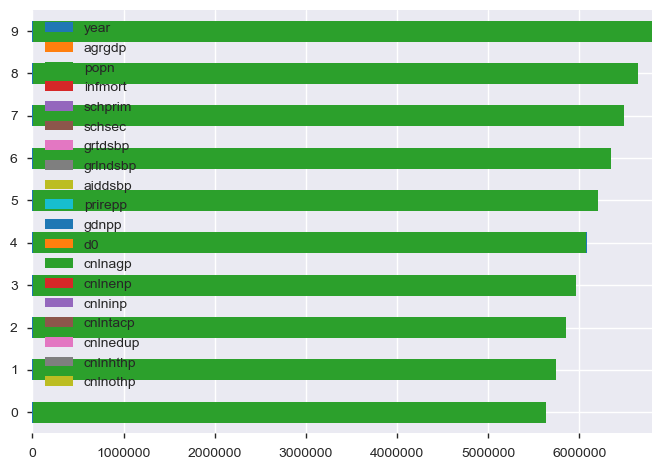

In [117]:
Aide_Africa_Finance[:10].plot(kind='barh', stacked=True)

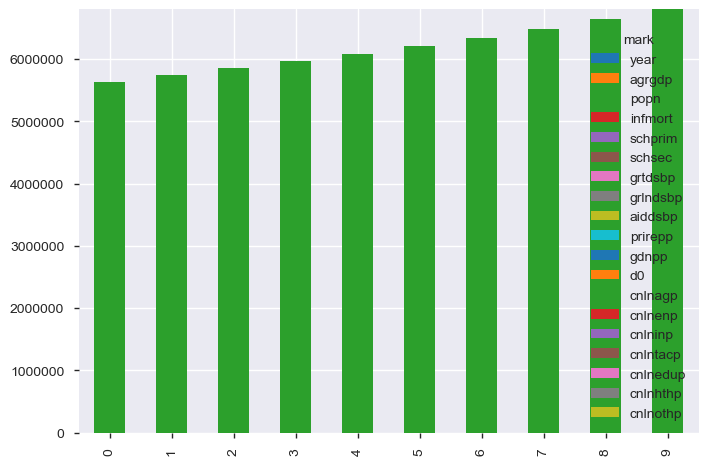

In [118]:
import seaborn as sns 

Aide_Africa_Finance[:10].plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

In [120]:
Aide_Africa_Finance.agrgdp.value_counts()

..             17
56.27994714    10
30.21085895     7
37.3            2
9.393333333     2
.               2
49.61282344     1
31.35335488     1
16.2077413      1
37.90313747     1
26.59668835     1
30.6446491      1
34.83428571     1
35.46295124     1
29.89801396     1
31.4410411      1
39.40459375     1
20.20605874     1
32.90579486     1
17.19871277     1
15.88913755     1
9.715403179     1
33.7361688      1
12.096718       1
23.69747899     1
34.15437003     1
18.20257632     1
32.59223808     1
24.99351595     1
27.5261324      1
               ..
30.46555949     1
28.14106137     1
38.99940568     1
29.71631971     1
28.99514529     1
15.25835866     1
32.66227005     1
5.199306759     1
39.64158617     1
10.82725922     1
35.44188862     1
27.17657537     1
24.18021101     1
11.0297499      1
32.94871795     1
35.65683646     1
15.13353116     1
12.87476636     1
36.16739069     1
33.24267254     1
36.01919424     1
13.8038255      1
29.57473837     1
32.22944414     1
37.7725930

In [8]:
Aide_Africa_Finance['countryc'].unique()

array(['Burkina Faso', 'Botswana', 'Cameroon', 'Ethiopia', 'Ghana',
       'Gambia, The', 'Kenya', 'Liberia', 'Lesotho', 'Madagascar',
       'Mauritius', 'Malawi', 'Nigeria', 'Sudan', 'Swaziland', 'Zaire',
       'Zambia', 'Zimbabwe'], dtype=object)

In [9]:
# Poverty rate of each state
Aide_Africa_Finance.agrgdp.replace(['-'],0.0,inplace = True)
Aide_Africa_Finance.Aide_Africa_Finance = Aide_Africa_Finance.Aide_Africa_Finance.astype(float)
area_list = list(Aide_Africa_Finance['agrgdp'].unique())
area_agrgdp = []
for i in area_list:
    x = Aide_Africa_Finance[Aide_Africa_Finance['agrgdp']==i]
    area_agrgdp = sum(x.poverty_rate)/len(x)
    area_agrgdp.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

AttributeError: 'DataFrame' object has no attribute 'Aide_Africa_Finance'

In [3]:
Data_bank.head(3)

,DMU,CountryYear,Country code,Country,Bank,ID,Foreign,Government,Bank code,Listed,...,MF,TF,IF,FinF,LoanLossRatio,IndepYear,Indep,Religion,W-House,W-Senate
0,Albaraka of Algeria-Banque Al Baraka d'Algerie...,Algeria/2005,1,Algeria,Albaraka of Algeria-Banque Al Baraka d'Algerie,AlgeriaAlbaraka of Algeria-Banque Al Baraka d'...,1,0,1,0,...,80.1,54.4,50.0,30.0,0.016087,1962,43,1,0.062,0.028
1,Albaraka of Algeria-Banque Al Baraka d'Algerie...,Algeria/2006,1,Algeria,Albaraka of Algeria-Banque Al Baraka d'Algerie,AlgeriaAlbaraka of Algeria-Banque Al Baraka d'...,1,0,1,0,...,78.8,61.0,50.0,30.0,0.011508,1962,44,1,0.062,0.028
2,Albaraka of Algeria-Banque Al Baraka d'Algerie...,Algeria/2007,1,Algeria,Albaraka of Algeria-Banque Al Baraka d'Algerie,AlgeriaAlbaraka of Algeria-Banque Al Baraka d'...,1,0,1,0,...,80.7,66.0,50.0,20.0,0.013184,1962,45,1,0.077,0.029


In [10]:
bank_country = Data_bank.groupby("Country").mean()



In [40]:
# Création d'une fonction permettant de calculer le total de valeurs manquantes, le pourcentage et le type de 
 ## chaque colonne 
import numpy as np
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [12]:
 missing_data = missing_data(bank_country)

In [13]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(bank_country)

In [14]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
   # print(missing_data)

,Total,Percent
STMC,27,0.642857
STMR,27,0.642857
W-Senate,25,0.595238
CI,20,0.476190
EFI,14,0.333333
Branches,13,0.309524
HHIDeposits,13,0.309524
HHIAssets,12,0.285714
HHILoans,12,0.285714
DomPrivOwnAssets,8,0.190476


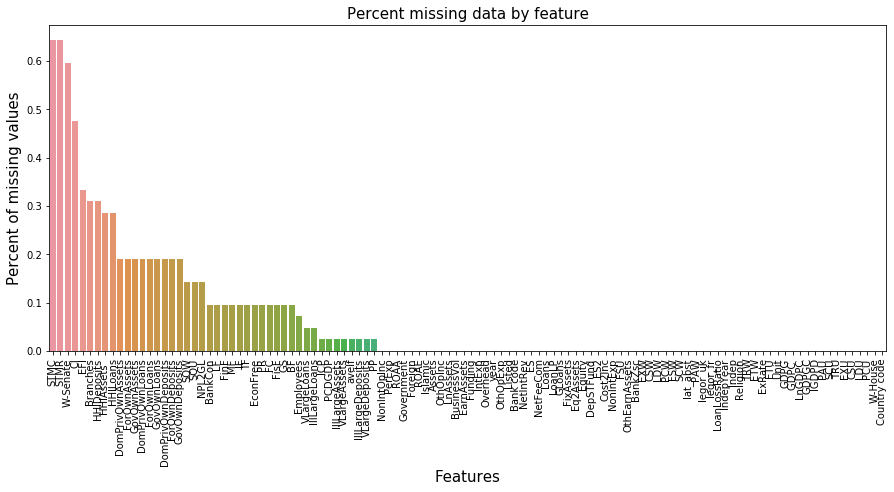

In [15]:

import pandas as pd

import numpy as np

import matplotlib as mpl

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

total = bank_country.isnull().sum().sort_values(ascending=False)
percent = (bank_country.isnull().sum()/bank_country.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data




In [16]:
features = list(bank_country.columns)
for feature in features:
    print(feature)

Country code
Foreign
Government
Bank code
Listed
Islamic
year
ES
ES2
Cost2Inc
DepSTFund
Equity
Eq2Assets
FixAssets
GLoans
NPL2GL
LoanLP
Loans
NetFeeCom
NetIntRev
Branches
Employees
OthOpExp
OthOpInc
Overhead
PerExp
ROAA
ROAE
Assets
LnAssets
BusinessVol
EarnAssets
Funding
IntExp
NonIntExp
NonIntOpInc
OthEarnAssets
ExRate
Unit
GDPG
GDPC 
LnGDPC
GDPGC
PCDGDP
ICP
IGDPD
STMC
STMR
ETU
PAU
TRU
EXU
CSU
LDU
PCU
FSU
SQU
SCU
ETW
PAW
TRW
EXW
CSW
LDW
PCW
FSW
SQW
SCW
IIILargeAssets
VLargeAssets
HHIAssets  
IIILargeLoans
VLargeLoans
HHILoans
IIILargeDeposits
VLargeDeposits
HHIDeposits
DomPrivOwnAssets
ForOwnAssets
GovOwnAssets
DomPrivOwnLoans
ForOwnLoans
GovOwnLoans
DomPrivOwnDeposits
ForOwnDeposits
GovOwnDeposits
BankCon
BankZsc
avelf
lat_abst
legor_uk
legor_fr
EFI
PP
CI
EconFree
PR
FC
FisF
GS
BF
LF
MF
TF
IF
FinF
LoanLossRatio
IndepYear
Indep
Religion
W-House
W-Senate


//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


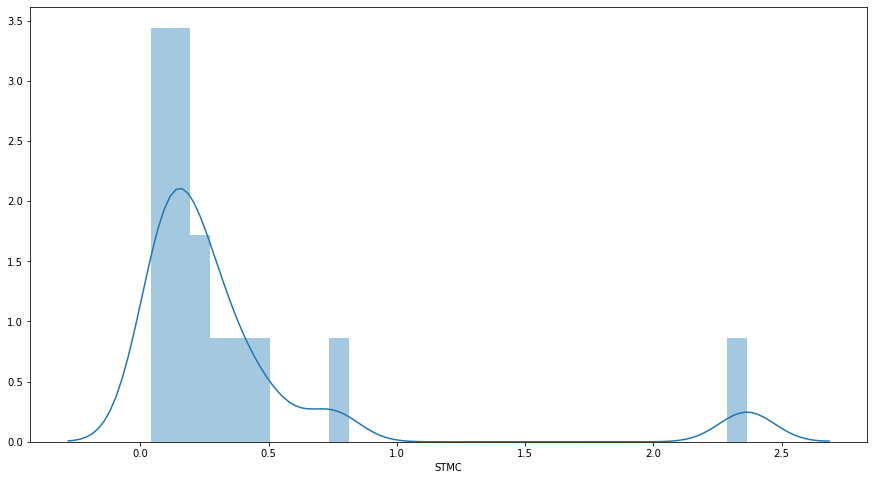

In [17]:
plt.figure(figsize=(15,8))
sns.distplot(bank_country.STMC, bins =30)

In [18]:
bank_country['STMC'].isnull().sum()

27

In [19]:
bank_country['STMC'].mean()

0.384567976107511

In [20]:
#bank_country['STMC'].replace(np.NaN,bank_country['STMC'].mean()).head(150)
bank_country['STMC'].replace(np.NaN,bank_country['STMC'].mean())
bank_country['STMR'].replace(np.NaN,bank_country['STMR'].mean())
bank_country['W-Senate'].replace(np.NaN,bank_country['W-Senate'].mean())
bank_country['CI'].replace(np.NaN,bank_country['CI'].mean())
bank_country['EFI'].replace(np.NaN,bank_country['EFI'].mean())
bank_country['Branches'].replace(np.NaN,bank_country['Branches'].mean())
bank_country['HHIDeposits'].replace(np.NaN,bank_country['HHIDeposits'].mean())
#bank_country['HHIAssets'].replace(np.NaN,bank_country['HHIAssets'].mean())
bank_country['HHILoans'].replace(np.NaN,bank_country['HHILoans'].mean())
bank_country['DomPrivOwnAssets'].replace(np.NaN,bank_country['DomPrivOwnAssets'].mean())
bank_country['ForOwnAssets'].replace(np.NaN,bank_country['ForOwnAssets'].mean())
bank_country['GovOwnLoans'].replace(np.NaN,bank_country['GovOwnLoans'].mean())

bank_country['MF'].replace(np.NaN,bank_country['MF'].mean())
bank_country['IF'].replace(np.NaN,bank_country['IF'].mean())
bank_country['TF'].replace(np.NaN,bank_country['TF'].mean())
bank_country['EconFree'].replace(np.NaN,bank_country['EconFree'].mean())
bank_country['PR'].replace(np.NaN,bank_country['PR'].mean())
bank_country['FC'].replace(np.NaN,bank_country['FC'].mean())

Country
Algeria               29.290323
Angola                20.600000
Benin                 28.909091
Botswana              57.121212
Burkina               31.500000
Burundi               22.714286
Cameroun              22.333333
Cape Verde            47.500000
Congo                 30.082130
Côte-d'Ivoire         20.351351
Eritrea               30.082130
Ethiopia              24.000000
Gabon                 30.750000
Gambia                30.082130
Ghana                 36.980769
Guinée                21.800000
Guinée Bissau         17.000000
Guinée Equatoriale    19.000000
Kenya                 20.912698
Lesotho               32.500000
Madagascar            31.666667
Malawi                27.647059
Mali                  29.380952
Mauritania            28.950000
Mauritius             46.711864
Morocco               33.370370
Mozambique            27.472222
Namibia               43.666667
Niger                 22.166667
Nigeria               20.384615
Rwanda                20.750000


In [21]:
#bank_country.HHIAssets

In [22]:
import pandas_profiling
import numpy as np
from pathlib import Path


profile_bank_country = pandas_profiling.ProfileReport(bank_country) 

#profile_bank_country.to_file(outputfile="/Users/garbamoussa/Desktop/Python_ML/bank_country.html")

//anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [23]:
#profile_bank_country

In [24]:
#Finding the columns whether they are categorical or numerical
cols = bank_country.columns
num_cols = bank_country._get_numeric_data().columns
print("Numerical Columns",num_cols)
cat_cols=list(set(cols) - set(num_cols))
print("Categorical Columns:",cat_cols)

Numerical Columns Index(['Country code', 'Foreign', 'Government', 'Bank code', 'Listed',
       'Islamic', 'year', 'ES', 'ES2', 'Cost2Inc',
       ...
       'MF', 'TF', 'IF', 'FinF', 'LoanLossRatio', 'IndepYear', 'Indep',
       'Religion', 'W-House', 'W-Senate'],
      dtype='object', length=112)
Categorical Columns: []


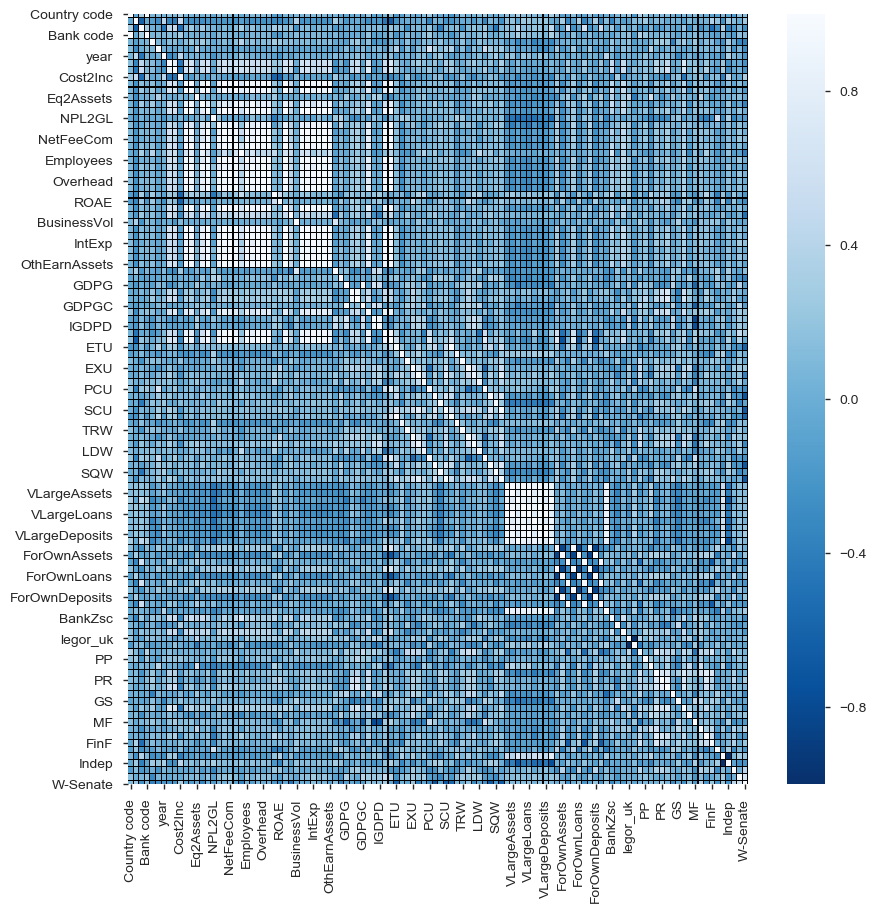

In [25]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(bank_country.corr(),ax=ax,annot= False,linewidth= 0.02,linecolor='black',fmt='.2f',cmap = 'Blues_r')
plt.show()

Text(0.5, 1.0, 'Correlation Plot')

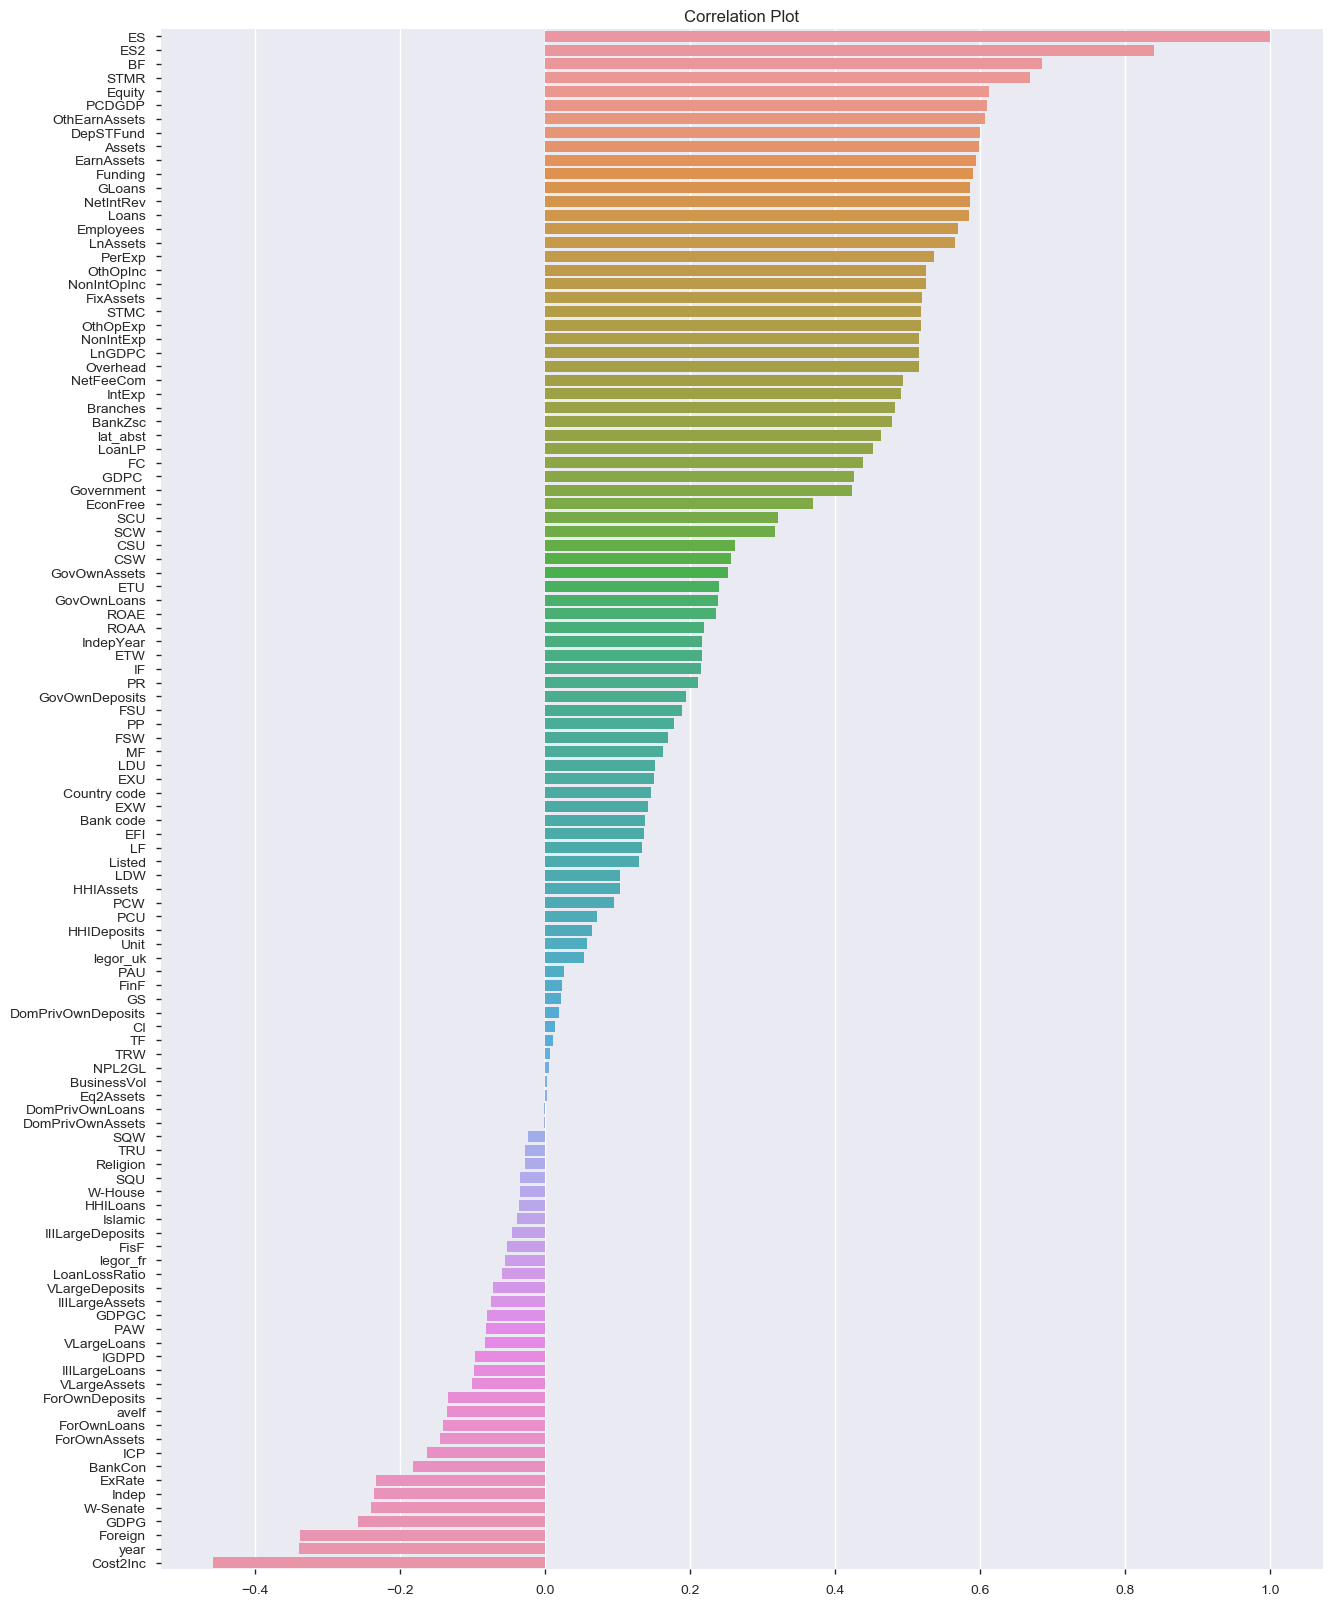

In [26]:
#price range correlation
corr=bank_country.corr()
corr=corr.sort_values(by=["ES"],ascending=False).iloc[0].sort_values(ascending=False)
plt.figure(figsize=(15,20))
sns.barplot(x=corr.values, y=corr.index.values);
plt.title("Correlation Plot")

Text(0.5, 1.0, 'Correlation Plot')

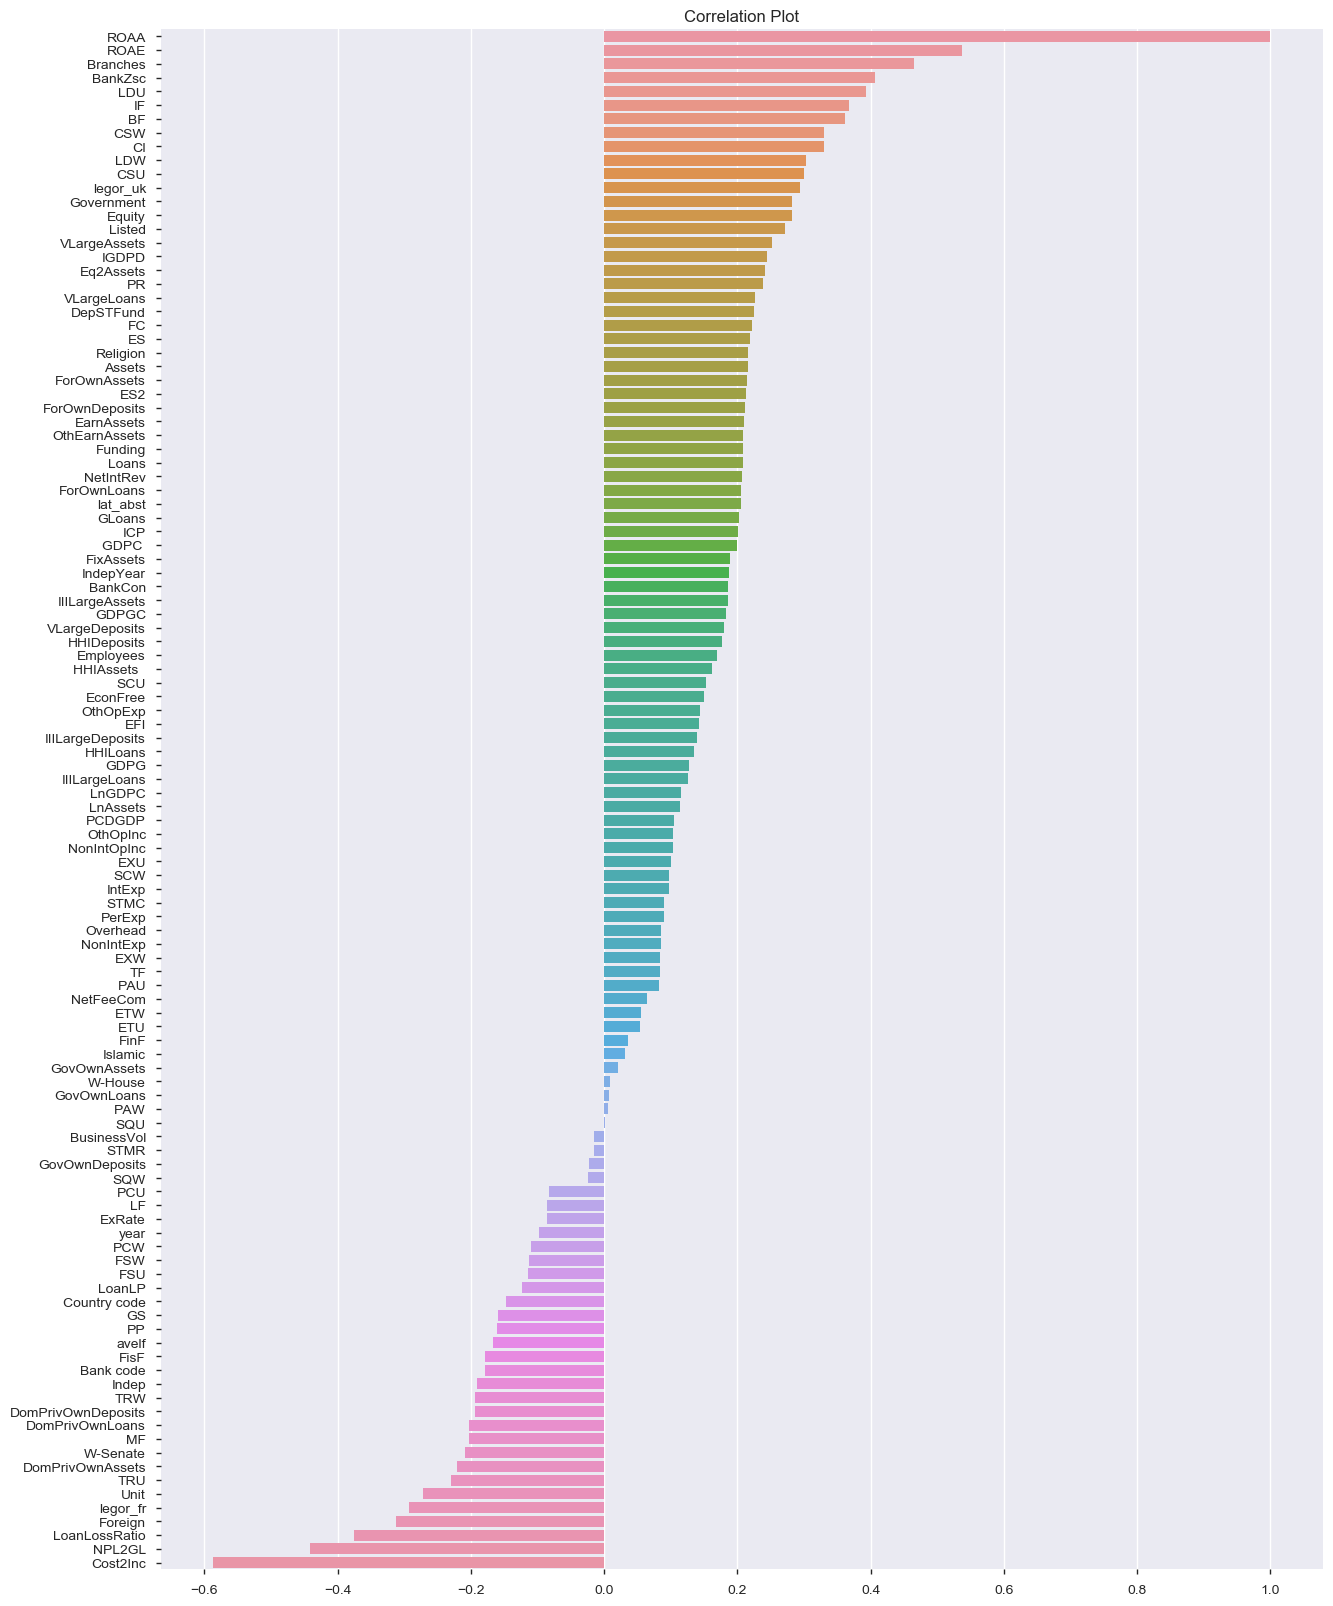

In [27]:
#price range correlation
corr=bank_country.corr()
corr=corr.sort_values(by=["ROAA"],ascending=False).iloc[0].sort_values(ascending=False)
plt.figure(figsize=(15,20))
sns.barplot(x=corr.values, y=corr.index.values);
plt.title("Correlation Plot")

In [28]:
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df[" "].values[::-1],
        x=df[" "].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace


In [29]:
#horizontal_bar_chart(bank_country,color="blue" )

In [30]:
import seaborn as sns 

#bank_country[:10].plot.bar(stacked=True)
#plt.legend(title='Caractéristiques des banques africaines')

#plt.show()

In [31]:
import seaborn as sns 
df_ES = bank_country.sort_values(by='ES', ascending=False)

#df_ES.plot.bar(stacked=True)
#plt.legend(title='Caractéristiques des banques africaines')

#plt.show()

In [32]:
df_ES.head()

,Country code,Foreign,Government,Bank code,Listed,Islamic,year,ES,ES2,Cost2Inc,...,MF,TF,IF,FinF,LoanLossRatio,IndepYear,Indep,Religion,W-House,W-Senate
Country,,,,,,,,,,,,,,,,,,,,,
Morocco,24.0,0.370370,0.555556,138.518519,0.629630,0.000000,2008.185185,0.760598,0.760185,0.465087,...,80.659259,62.066667,63.333333,45.555556,0.003465,1956.0,52.185185,1.0,0.105333,0.015889
South Africa,33.0,0.408451,0.000000,193.450704,0.084507,0.000000,2007.788732,0.717068,0.587499,0.624138,...,76.828169,75.422535,49.084507,57.605634,0.010374,1961.0,46.788732,3.0,0.371634,0.348634
Tunisia,38.0,0.471264,0.264368,251.057471,0.609195,0.057471,2007.574713,0.650611,0.590221,0.590397,...,79.989655,53.844828,30.862069,30.000000,0.079467,1956.0,51.574713,1.0,0.244552,0.146586
Namibia,26.0,0.666667,0.111111,152.222222,0.222222,0.000000,2007.666667,0.607598,0.527004,0.561728,...,74.592593,85.051852,42.962963,49.629630,0.005159,1990.0,17.666667,3.0,0.264370,0.269000
Eritrea,43.0,0.000000,1.000000,288.000000,0.000000,0.000000,2006.000000,0.605970,0.587051,0.115267,...,NaN,NaN,NaN,NaN,0.001402,1993.0,13.000000,1.0,0.220000,NaN


In [33]:
import xgboost as xgb 
clf = xgb.XGBClassifier() 
clf.__dict__

{'max_depth': 3,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'verbosity': 1,
 'silent': None,
 'objective': 'binary:logistic',
 'booster': 'gbtree',
 'gamma': 0,
 'min_child_weight': 1,
 'max_delta_step': 0,
 'subsample': 1,
 'colsample_bytree': 1,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'base_score': 0.5,
 'missing': nan,
 'kwargs': {},
 '_Booster': None,
 'seed': None,
 'random_state': 0,
 'nthread': None,
 'n_jobs': 1,
 'importance_type': 'gain'}

In [34]:
bank_country.head()

,Country code,Foreign,Government,Bank code,Listed,Islamic,year,ES,ES2,Cost2Inc,...,MF,TF,IF,FinF,LoanLossRatio,IndepYear,Indep,Religion,W-House,W-Senate
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,1.0,0.580645,0.290323,7.532258,0.000000,0.0,2007.741935,0.596798,0.431042,0.433436,...,79.174194,65.687097,47.258065,28.387097,0.022867,1962.0,45.741935,1.0,0.072887,0.037242
Angola,2.0,0.326923,0.230769,19.019231,0.000000,0.0,2007.596154,0.259412,0.199838,0.559663,...,54.040000,71.280000,25.000000,42.000000,0.032801,1975.0,32.596154,4.0,0.270288,NaN
Benin,3.0,0.545455,0.000000,25.500000,0.272727,0.0,2007.409091,0.324694,0.265900,0.715561,...,79.827273,61.345455,37.727273,55.000000,0.020364,1960.0,47.409091,4.0,0.094909,NaN
Botswana,4.0,0.666667,0.000000,32.060606,0.454545,0.0,2007.757576,0.442809,0.275331,0.557292,...,73.106061,71.687879,71.515152,70.000000,0.013369,1966.0,41.757576,4.0,0.099364,NaN
Burkina,5.0,1.000000,0.000000,37.807692,0.230769,0.0,2007.230769,0.235428,0.207442,0.617048,...,80.173077,66.226923,45.000000,50.000000,0.052386,1960.0,47.230769,1.0,0.139154,NaN


In [42]:
bank_country1 = Data_bank.groupby("Country")

In [45]:
#missing_data = missing_data(bank_country1)
bank_country1.apply(missing_data)

DMU CountryYear Country code Country    Bank      ID  \
Country                                                                    
Algeria Total         0           0            0       0       0       0   
        Percent       0           0            0       0       0       0   
        Types    object      object        int64  object  object  object   
Angola  Total         0           0            0       0       0       0   
        Percent       0           0            0       0       0       0   
...                 ...         ...          ...     ...     ...     ...   
Uganda  Percent       0           0            0       0       0       0   
        Types    object      object        int64  object  object  object   
Zambia  Total         0           0            0       0       0       0   
        Percent       0           0            0       0       0       0   
        Types    object      object        int64  object  object  object   

                Foreign Government Bank code Listed  ...       MF       TF  \
Country                                              ...                     
Algeria Total         0          0         0      0  ...        0        0   
        Percent       0          0         0      0  ...        0        0   
        Types     int64      int64     int64  int64  ...  float64  float64   
Angola  Total         0          0         0      0  ...        7        7   
        Percent       0          0         0      0  ...  13.4615  13.4615   
...                 ...        ...       ...    ...  ...      ...      ...   
Uganda  Percent       0          0         0      0  ...        0        0   
        Types     int64      int64     int64  int64  ...  float64  float64   
Zambia  Total         0          0         0      0  ...        0        0   
        Percent       0          0         0      0  ...        0        0   
        Types     int64      int64     int64  int64  ...  float64  float64   

                      IF     FinF LoanLossRatio IndepYear  Indep Religion  \
Country                                                                     
Algeria Total          0        0             1         0      0        0   
        Percent        0        0        1.6129         0      0        0   
        Types    float64  float64       float64     int64  int64    int64   
Angola  Total          7        7             0         0      0        0   
        Percent  13.4615  13.4615             0         0      0        0   
...                  ...      ...           ...       ...    ...      ...   
Uganda  Percent        0        0       10.4167         0      0        0   
        Types    float64  float64       float64     int64  int64    int64   
Zambia  Total          0        0             0         0      0        0   
        Percent        0        0             0         0      0        0   
        Types    float64  float64       float64     int64  int64    int64   

                 W-House W-Senate  
Country                            
Algeria Total          0        0  
        Percent        0        0  
        Types    float64  float64  
Angola  Total          0       52  
        Percent        0      100  
...                  ...      ...  
Uganda  Percent        0      100  
        Types    float64  float64  
Zambia  Total          0       40  
        Percent        0      100  
        Types    float64  float64  

[126 rows x 119 columns]

In [37]:
bank_country1.dropna()

AttributeError: Cannot access callable attribute 'dropna' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [39]:
#bank_country1.dropna(how='all')
bank_country1.dropna(thresh=5)

AttributeError: Cannot access callable attribute 'dropna' of 'DataFrameGroupBy' objects, try using the 'apply' method